In [87]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

def cbers_raster(raster):
    
    with rasterio.open(raster, 'r') as dst:
        band1 = dst.read(1)
        band2 = dst.read(2)
        band3 = dst.read(3)
        band4 = dst.read(4)
        profile = dst.profile
        
    return band1, band2, band3, band4, profile

def cbres_index():
    band1, band2, band3, band4, profile = cbers_raster(raster)
    
    #nomalizar os dados
    ir = normalize(band4)
    r = normalize(band3)
    g = normalize(band2)
    b = normalize(band1)
    
    #creating indexes
    ndvi = (ir-r)/(ir+r)
    ndwi = (g-ir)/(g+ir)
    
    return ndvi, ndwi, profile

def plot_cbers():    
    ndvi, ndwi, profile = cbres_index()
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(21,7))
    show(ndvi, ax = ax1, cmap="RdYlGn", transform=profile['transform'], title='NDVI INDEX', vmin=-1, vmax=1)
    show(ndwi, ax = ax2, cmap='Blues', transform=profile['transform'], title='NDWI INDEX', vmin=-1, vmax=1)


    return


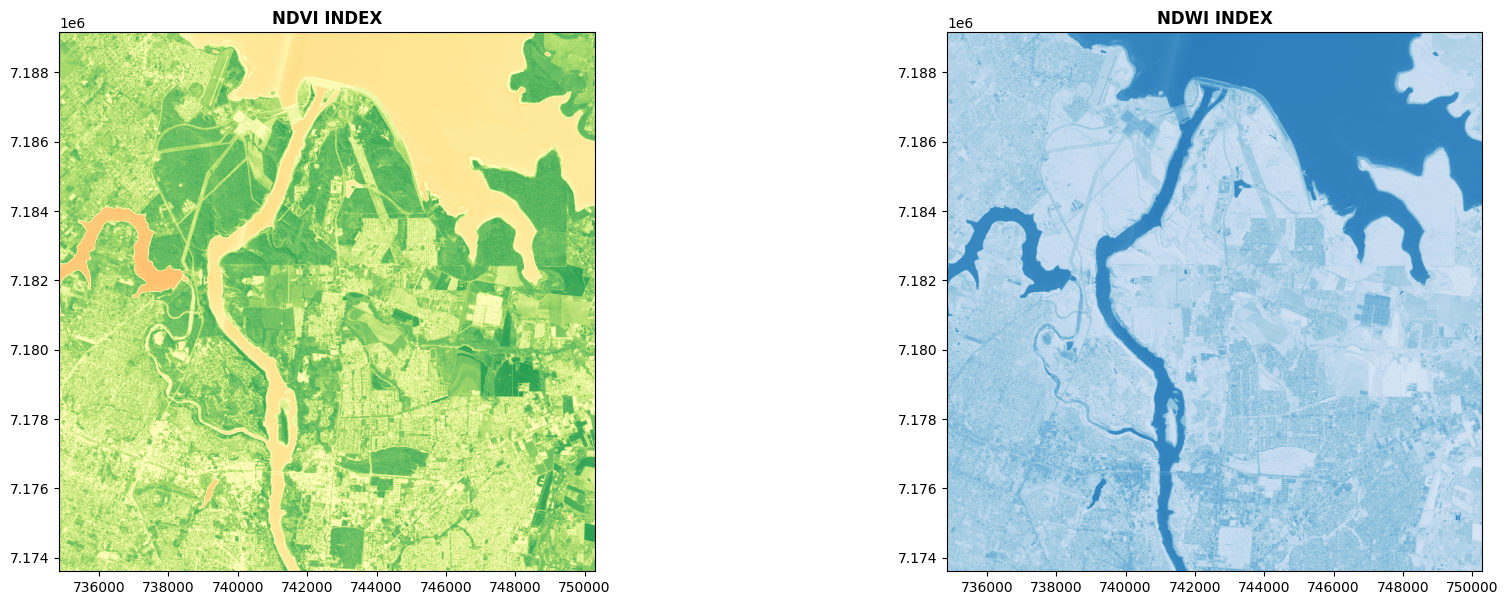

In [88]:
raster = 'cbers.tif'
plot_cbers()